## Import libraries

First, let's import libraries that we will need.

In [1]:
# Natural Language Tool Kit (NLTK)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Regular Expression for text preprocessing
import re

# Heap (priority) queue algorithm to get the top sentences
import heapq

# NumPy for numerical computing
import numpy as np

# pandas for creating DataFrames
import pandas as pd

# matplotlib for plot
from matplotlib import pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/zzy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zzy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load text data

I used the text from a news article entitled **Apple Acquires AI Startup For $50 Million To Advance Its Apps**. 

You can find the original news article here:
https://analyticsindiamag.com/apple-acquires-ai-startup-for-50-million-to-advance-its-apps/

In [3]:
# load text file
with open('output.txt', 'r') as f:
    file_data = f.read()

Let's take a look at the text.

In [4]:
# view text data
print(file_data)

university south carolina division law enforcement safety annual security fire safety report year university south carolina annual security fire safety report calendar year p ublic safety statistic columbia campus report annual disclosure crime statistic preparing report division law enforcement safety division enforcement authority training interagency cooperation reporting criminal incident emergency reporting division law enforcement safety campus security authority emergency call box daily crime log sexual assault domestic violenc e dating violence relationship violence stalking consent definition sexual ssault domestic violence dating violence stalking interpersonal violence act relationship violence including domestic violence dating violence sexual assault stalking harassment criminal investigation right victim university administrative inquiry office civil right title ix office student conduct academic integrity right accuser right accused possible sanction contact letter restr

## Preprocess text

We use regular expression to do text preprocessing. We will:
1. replace reference number with empty space, if any...
2. replace one or more spaces with single space.

In [5]:
text = file_data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace reference number i.e. [1], [10], [20] with empty space, if any..
text = re.sub(r'\s+',' ',text) # replace one or more spaces with single space
print(text)

university south carolina division law enforcement safety annual security fire safety report year university south carolina annual security fire safety report calendar year p ublic safety statistic columbia campus report annual disclosure crime statistic preparing report division law enforcement safety division enforcement authority training interagency cooperation reporting criminal incident emergency reporting division law enforcement safety campus security authority emergency call box daily crime log sexual assault domestic violenc e dating violence relationship violence stalking consent definition sexual ssault domestic violence dating violence stalking interpersonal violence act relationship violence including domestic violence dating violence sexual assault stalking harassment criminal investigation right victim university administrative inquiry office civil right title ix office student conduct academic integrity right accuser right accused possible sanction contact letter restr

Next, we form a **clean text** with lower case (without special characters, digits and extra spaces) and split it into individual word, for word score computation and formation of the word histogram. 

The reason to form a clean text is so that the algorithm won't treat, i.e. **"understanding"** and **understanding**, as two different words.

In [6]:
# generate clean text
clean_text = text.lower() # convert all uppercase characters into lowercase characters

# replace characters other than [a-zA-Z0-9], digits & one or more spaces with single space
regex_patterns = [r'\W',r'\d',r'\s+']
for regex in regex_patterns:
    clean_text = re.sub(regex,' ',clean_text)

print(clean_text)

university south carolina division law enforcement safety annual security fire safety report year university south carolina annual security fire safety report calendar year p ublic safety statistic columbia campus report annual disclosure crime statistic preparing report division law enforcement safety division enforcement authority training interagency cooperation reporting criminal incident emergency reporting division law enforcement safety campus security authority emergency call box daily crime log sexual assault domestic violenc e dating violence relationship violence stalking consent definition sexual ssault domestic violence dating violence stalking interpersonal violence act relationship violence including domestic violence dating violence sexual assault stalking harassment criminal investigation right victim university administrative inquiry office civil right title ix office student conduct academic integrity right accuser right accused possible sanction contact letter restr

## Split text into sentences

We split (tokenize) the text into sentences using NLTK **sent_tokenize()** method. We will evaluate the importance of each of sentences, then decide if we should each include in our summary. 

In [7]:
# split (tokenize) the sentences
sentences = nltk.sent_tokenize(text)
print(sentences)

['university south carolina division law enforcement safety annual security fire safety report year university south carolina annual security fire safety report calendar year p ublic safety statistic columbia campus report annual disclosure crime statistic preparing report division law enforcement safety division enforcement authority training interagency cooperation reporting criminal incident emergency reporting division law enforcement safety campus security authority emergency call box daily crime log sexual assault domestic violenc e dating violence relationship violence stalking consent definition sexual ssault domestic violence dating violence stalking interpersonal violence act relationship violence including domestic violence dating violence sexual assault stalking harassment criminal investigation right victim university administrative inquiry office civil right title ix office student conduct academic integrity right accuser right accused possible sanction contact letter res

## Remove stop words

Stop words are English words which do not add much meaning to a sentence. They can be safely ignored without sacrificing the meaning of the sentence. We already downloaded a file with English stop words in the first section of the notebook. 

Here, we will get the list of stop words and store them in **stop_word** variable.

In [8]:
# get stop words list
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Build word histogram

Let's evaluate the importance of each word based on how many times it appears in the entire text.

We will do so by 1) splitting the words in **clean_text**, 2) removing the stop words, and then 3) checking the frequency of each word as it appears in the text.

In [9]:
# create an empty dictionary to house the word count
word_count = {}

# loop through tokenized words, remove stop words and save word count to dictionary
for word in nltk.word_tokenize(clean_text):
    # remove stop words
    if word not in stop_words:
        # save word count to dictionary
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

Let's plot the word histogram and see the results.

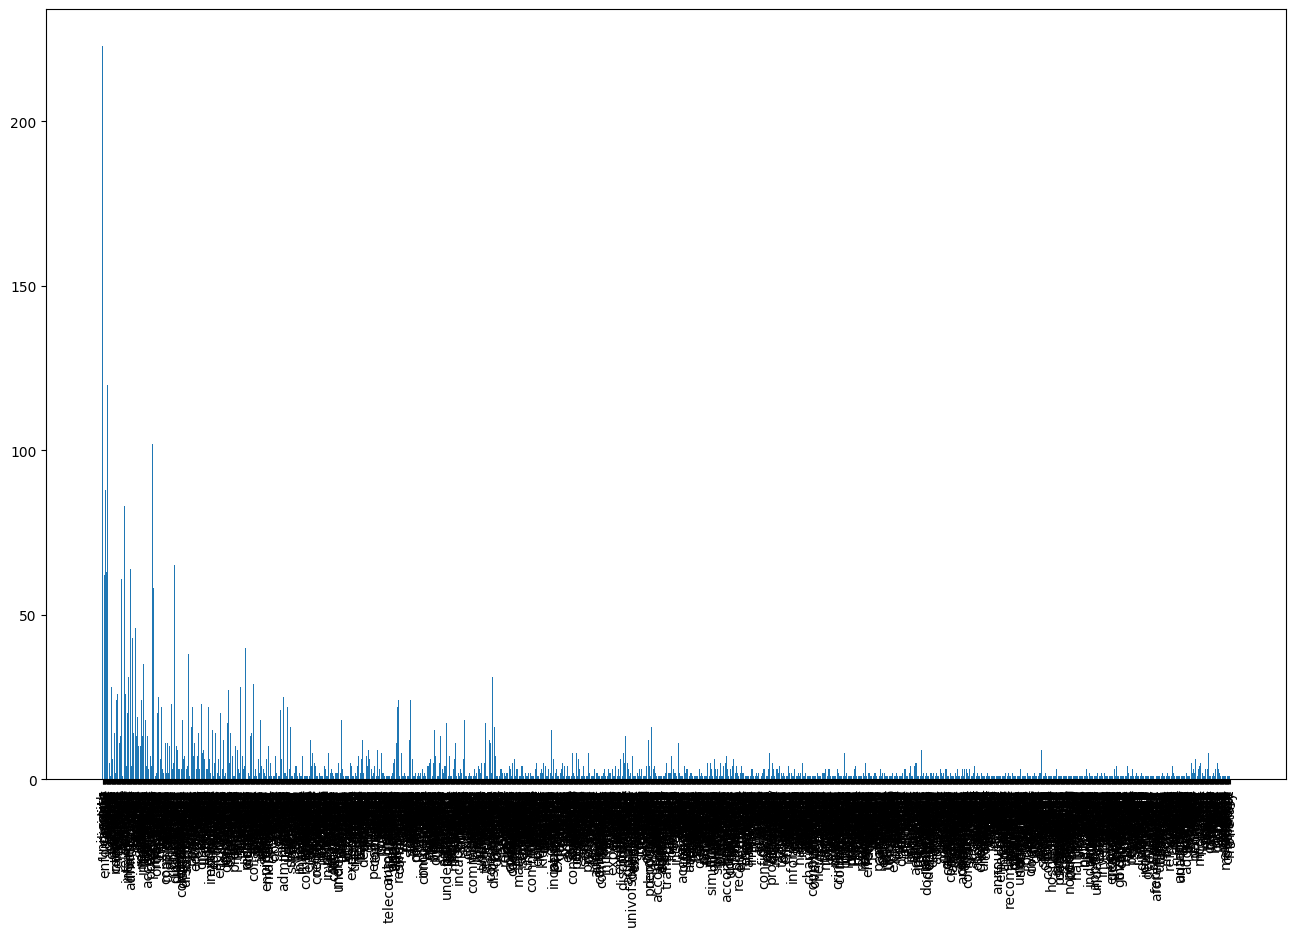

In [10]:
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.bar(word_count.keys(), word_count.values())
plt.show()

Ahhh... it's a bit difficult to read the plot. Let's convert it to horizontal bar plot and display only the top 20 words with a helper function below.

In [11]:
# helper function for plotting the top words.
def plot_top_words(word_count_dict, show_top_n=20):
    """
    Plot top words
    
    INPUT:
    word_count_dict - dict. word count housed in a dictionary
    show_top_n - int. top n words to display (default 20)
    
    OUTPUT:
    Plot with top n words
    
    """
    word_count_table = pd.DataFrame.from_dict(word_count_dict, orient = 'index').rename(columns={0: 'score'})
    word_count_table.sort_values(by='score').tail(show_top_n).plot(kind='barh', figsize=(10,10))
    plt.show()

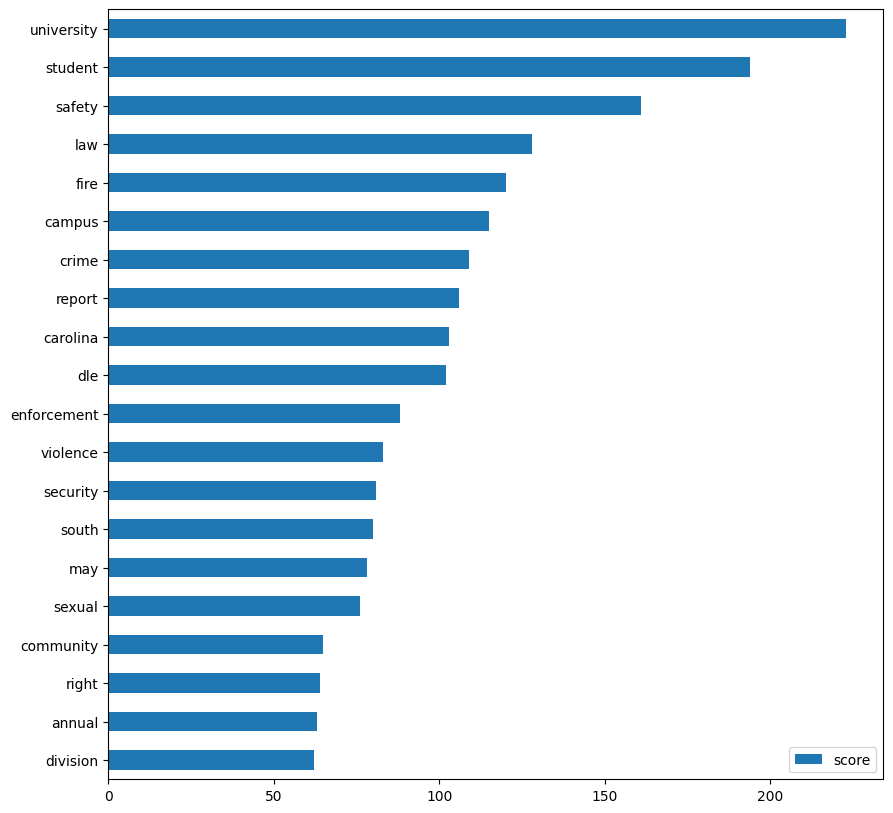

In [12]:
plot_top_words(word_count, 20)

From the plot above, we can see the words **'ai'** and **'apple'** appear on the top. This makes sense because the article is about Apple acquiring an AI startup.

## Rank sentences based on scores

Now, we are going to rank the importance of each sentence based on sentence score. We will:

- remove sentences that have more than **30** words, recognizing that long sentences may not always be meaningful;
- then, add score from each word that forms the sentence to form the sentence score.

Sentence that have high scores will form our top sentences. The top sentences will form our summary later.

In [17]:
# create empty dictionary to house sentence score    
sentence_score = {}

# loop through tokenized sentence, only take sentences that have less than 30 words, then add word score to form sentence score
for sentence in sentences:
    # check if word in sentence is in word_count dictionary
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            # only take sentence that has less than 30 words
            if len(sentence.split(' ')) < 30:
                # add word score to sentence score
                if sentence not in sentence_score.keys():
                    sentence_score[sentence] = word_count[word]
                else:
                    sentence_score[sentence] += word_count[word]

We convert the **sentence_score** dictionary to a DataFrame and display the sentences and scores.

**Note**: dictionary doesn't allow you to sort the sentences based on scores, so you need to convert the data stored in dictionary to DataFrame.

In [36]:
df_sentence_score = pd.DataFrame.from_dict(sentence_score, orient = 'index').rename(columns={0: 'score'})
df_sentence_score.sort_values(by='score')

KeyError: 'score'

## Select top sentences for summary

We use heap queue algorithm to select the top 3 sentences and store them in **best_sentences** variable.

**Note:** I chose 3 because our text is a relatively short article.

In [27]:
# get the best 3 sentences for summary             
best_sentences = heapq.nlargest(3, sentence_score, key=sentence_score.get)

Let's display our text summary

In [29]:
print('SUMMARY')
print('------------------------')

# display top sentences based on their sentence sequence in the original text
for sentence in sentences:
    if sentence in best_sentences:
        print (sentence)

SUMMARY
------------------------


## Insights & Analysis

You have created your personal text summarizer in Python. The summary should look pretty decent.